<a href="https://colab.research.google.com/github/Munniz1309/worldcup/blob/main/worldcup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Notebook 02**
- **Professor:** Iális Cavalcante
- **Monitor:** Iago Magalhães
- **Disciplina:** Ciência de dados
- **Curso:** Engenharia da Computação
- **Descrição:**
No notebook 02 continuaremos aprendendo sobre reressão linear. Agora iremos aplicar este algoritmo a base de dados 'WorlCup 2022' que tras informações sobre a copa do mundo de futebol masculino de 2022. Neste dataset algumas informações são fornecidas como Times, Gols, Assitências e outras informações primodiais através de um arquivo CSV. Neste exemplo básico iremos explorar um pouco os dados presentes no dataset e realizar a previsão do número de gols com base em alguns atributos.



##Instalação de bibliotecas

In [ ]:
!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


##Importações de bibliotecas

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

##Leitura de dados

In [ ]:
worldcup = pd.read_csv('/content/2022worldcup.csv')
worldcup

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
0,Argentina,24,27.5,57.4,7,77,690,7.7,15,8,...,1.96,1.04,3.00,1.43,2.48,1.96,1.00,2.97,1.47,2.48
1,Australia,20,27.8,37.8,4,44,360,4.0,3,3,...,0.75,0.75,1.50,0.75,1.50,0.58,0.48,1.06,0.58,1.06
2,Belgium,20,29.7,57.0,3,33,270,3.0,1,1,...,0.33,0.33,0.67,0.33,0.67,1.57,1.27,2.85,1.57,2.85
3,Brazil,26,27.6,56.2,5,55,480,5.3,8,6,...,1.50,1.13,2.62,1.31,2.44,2.24,1.54,3.79,2.09,3.64
4,Cameroon,22,27.2,41.7,3,33,270,3.0,4,4,...,1.33,1.33,2.67,1.33,2.67,1.14,0.66,1.80,1.14,1.80
5,Canada,19,27.3,52.0,3,33,270,3.0,1,1,...,0.33,0.33,0.67,0.33,0.67,1.41,0.95,2.35,1.18,2.13
6,Costa Rica,22,29.7,31.3,3,33,270,3.0,3,1,...,1.00,0.33,1.33,1.00,1.33,0.48,0.20,0.68,0.48,0.68
7,Croatia,21,28.3,54.3,7,77,690,7.7,8,8,...,1.04,1.04,2.09,1.04,2.09,0.91,0.74,1.65,0.91,1.65
8,Denmark,20,26.6,60.0,3,33,270,3.0,1,1,...,0.33,0.33,0.67,0.33,0.67,0.90,0.59,1.49,0.90,1.49
9,Ecuador,18,24.9,53.3,3,33,270,3.0,4,2,...,1.33,0.67,2.00,1.00,1.67,1.24,0.60,1.84,0.98,1.58


##Funções extras

##Análise de dados

In [ ]:
#Crie um código para exibir o shape da base de dados disponibilizada
worldcup.shape

(32, 32)

In [ ]:
worldcup.dtypes

Squad          object
# Pl            int64
Age           float64
Poss          float64
MP              int64
Starts          int64
Min             int64
90s           float64
Gls             int64
Ast             int64
G+A             int64
G-PK            int64
PK              int64
PKatt           int64
CrdY            int64
CrdR            int64
xG            float64
npxG          float64
xAG           float64
npxG+xAG      float64
PrgC            int64
PrgP            int64
Gls90         float64
Ast90         float64
G+A90         float64
G-PK90        float64
G+A-PK90      float64
xG90          float64
xAG90         float64
xG+xAG90      float64
npxG90        float64
npxG+xAG90    float64
dtype: object

In [ ]:
#Verifique a existência de valores nulos
print(worldcup.isnull().sum())

Squad         0
# Pl          0
Age           0
Poss          0
MP            0
Starts        0
Min           0
90s           0
Gls           0
Ast           0
G+A           0
G-PK          0
PK            0
PKatt         0
CrdY          0
CrdR          0
xG            0
npxG          0
xAG           0
npxG+xAG      0
PrgC          0
PrgP          0
Gls90         0
Ast90         0
G+A90         0
G-PK90        0
G+A-PK90      0
xG90          0
xAG90         0
xG+xAG90      0
npxG90        0
npxG+xAG90    0
dtype: int64


In [ ]:
worldcup.describe()

,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,21.250000,27.196875,49.443750,4.000000,44.000000,369.375000,4.100000,5.312500,3.781250,9.093750,...,1.195312,0.838125,2.035312,1.081562,1.921875,1.253125,0.840625,2.095937,1.130313,1.965625
std,1.951013,1.177609,9.457066,1.344043,14.784473,135.763967,1.506973,4.130434,3.220242,7.248401,...,0.656329,0.544950,1.167589,0.590517,1.107766,0.555689,0.421364,0.960067,0.499274,0.920985
min,18.000000,24.500000,31.300000,3.000000,33.000000,270.000000,3.000000,1.000000,0.000000,1.000000,...,0.330000,0.000000,0.330000,0.000000,0.000000,0.470000,0.200000,0.680000,0.470000,0.680000
25%,20.000000,26.575000,42.750000,3.000000,33.000000,270.000000,3.000000,2.750000,1.000000,3.750000,...,0.730000,0.330000,1.000000,0.670000,1.000000,0.910000,0.590000,1.520000,0.890000,1.470000
50%,21.000000,27.300000,50.150000,3.500000,38.500000,315.000000,3.500000,4.500000,3.000000,7.000000,...,1.200000,0.710000,2.000000,1.000000,1.670000,1.140000,0.810000,1.920000,1.105000,1.845000
75%,22.000000,27.850000,54.775000,4.250000,46.750000,405.000000,4.475000,6.500000,5.000000,11.750000,...,1.670000,1.135000,2.752500,1.490000,2.527500,1.412500,0.950000,2.342500,1.245000,2.190000
max,26.000000,29.700000,75.800000,7.000000,77.000000,690.000000,7.700000,16.000000,12.000000,28.000000,...,2.600000,2.200000,4.800000,2.400000,4.600000,3.350000,2.500000,5.850000,3.090000,5.590000


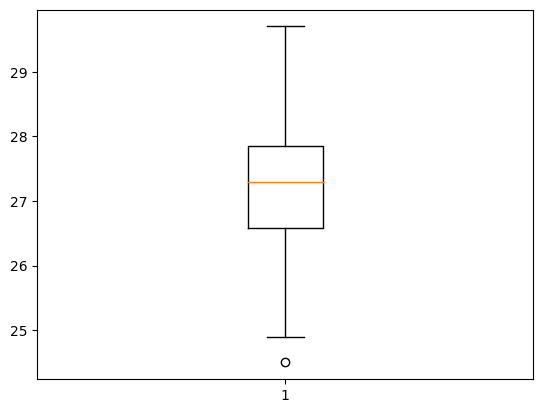

In [ ]:
#Aplicando gráfico de boxplot ao campo 'Age' do dataset
plt.boxplot(worldcup['Age']);

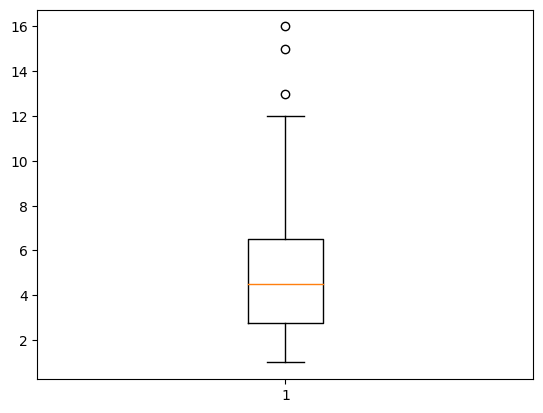

In [ ]:
#Aplicando gráfico de boxplot ao campo 'Gls' do dataset
plt.boxplot(worldcup['Gls']);

In [ ]:
#Analisando a correlação dos dados
worldcup.drop(columns=['Squad']).corr()

,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
# Pl,1.000000,0.126714,-0.027711,0.578180,0.578180,0.575434,0.572721,0.518385,0.491619,0.513808,...,0.371514,0.381531,0.385139,0.388279,0.394109,0.212593,0.173634,0.202226,0.226432,0.216777
Age,0.126714,1.000000,-0.366198,-0.114133,-0.114133,-0.100897,-0.098521,-0.248491,-0.226458,-0.242208,...,-0.324854,-0.280045,-0.311808,-0.310884,-0.301751,-0.118934,-0.032241,-0.082299,-0.054370,-0.040761
Poss,-0.027711,-0.366198,1.000000,0.183742,0.183742,0.193908,0.193980,0.418743,0.437578,0.433019,...,0.416399,0.455048,0.446664,0.380004,0.426796,0.511401,0.525845,0.527381,0.497286,0.513411
MP,0.578180,-0.114133,0.183742,1.000000,1.000000,0.997056,0.996997,0.778636,0.760216,0.781439,...,0.428579,0.439981,0.445239,0.400340,0.429852,0.182266,0.145247,0.170994,0.144695,0.151929
Starts,0.578180,-0.114133,0.183742,1.000000,1.000000,0.997056,0.996997,0.778636,0.760216,0.781439,...,0.428579,0.439981,0.445239,0.400340,0.429852,0.182266,0.145247,0.170994,0.144695,0.151929
Min,0.575434,-0.100897,0.193908,0.997056,0.997056,1.000000,0.999941,0.774649,0.750804,0.774985,...,0.421466,0.426925,0.435267,0.393325,0.419871,0.183674,0.144871,0.171662,0.148436,0.153739
90s,0.572721,-0.098521,0.193980,0.996997,0.996997,0.999941,1.000000,0.773743,0.749814,0.774030,...,0.419912,0.425446,0.433713,0.391167,0.418005,0.183130,0.143768,0.170856,0.147144,0.152516
Gls,0.518385,-0.248491,0.418743,0.778636,0.778636,0.774649,0.773743,1.000000,0.943872,0.989174,...,0.867540,0.798809,0.859231,0.820432,0.829805,0.467290,0.361125,0.430737,0.388196,0.384934
Ast,0.491619,-0.226458,0.437578,0.760216,0.760216,0.750804,0.749814,0.943872,1.000000,0.982126,...,0.816811,0.891654,0.874823,0.807312,0.868949,0.437544,0.410909,0.435216,0.403324,0.416897
G+A,0.513808,-0.242208,0.433019,0.781439,0.781439,0.774985,0.774030,0.989174,0.982126,1.000000,...,0.857244,0.851329,0.878282,0.826180,0.858904,0.460668,0.388338,0.438805,0.400395,0.404566


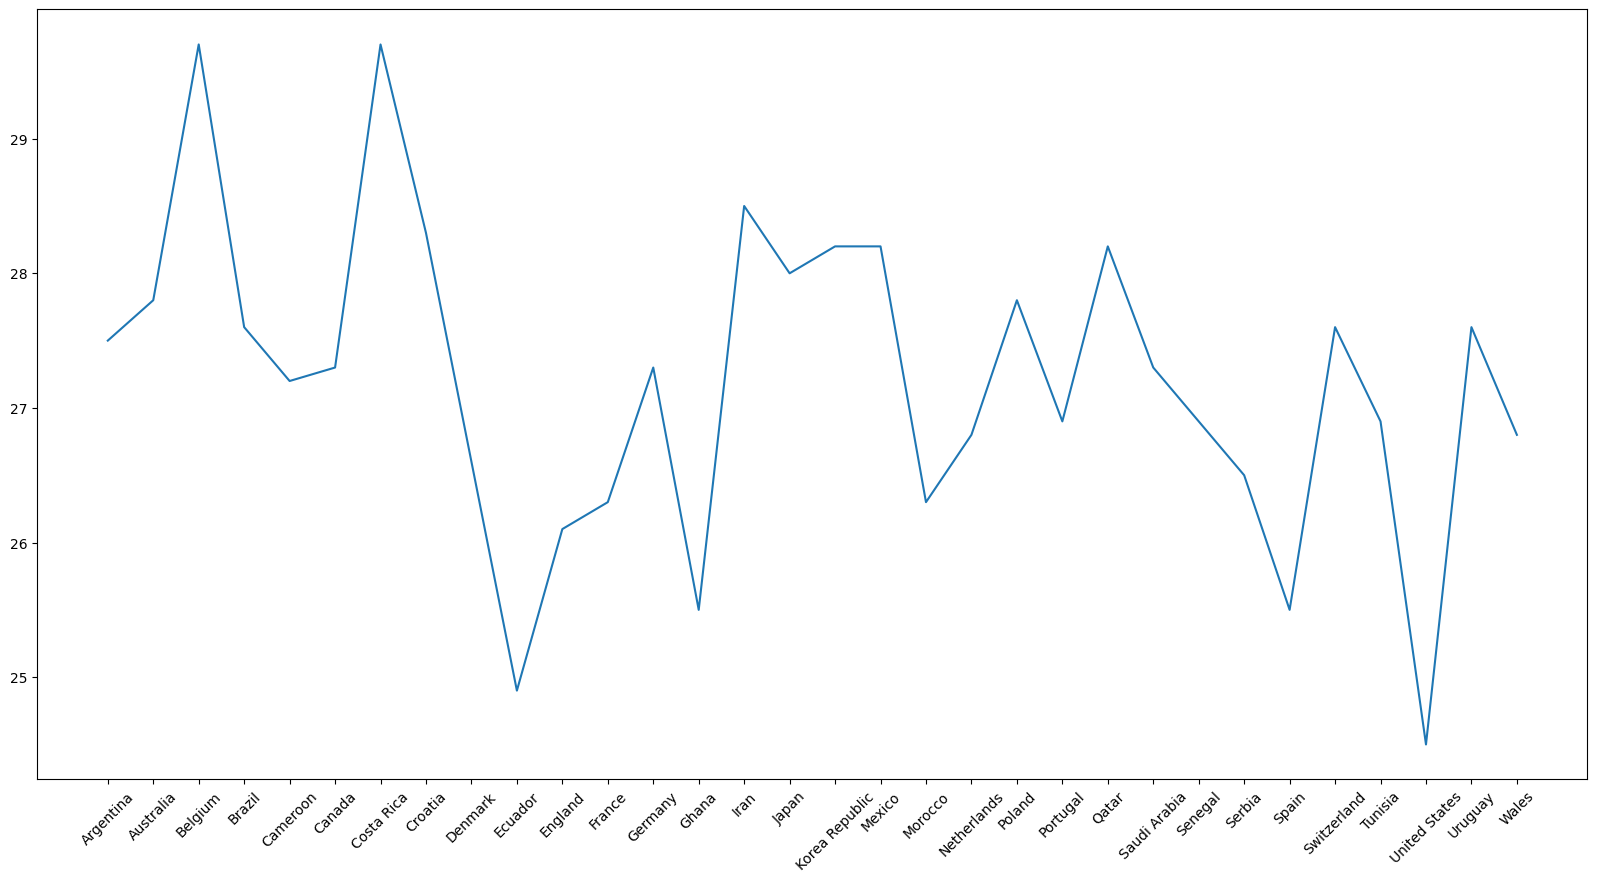

In [ ]:
plt.figure(figsize=(20,10))
#Crie um gráfico onde o eixo x tenha como valores as equipes qeu disputam a competição e no eixo y, a idade média dos jogadores
plt.plot(worldcup['Squad'], worldcup['Age'])
plt.tick_params(axis='x', labelrotation=45)
plt.show()

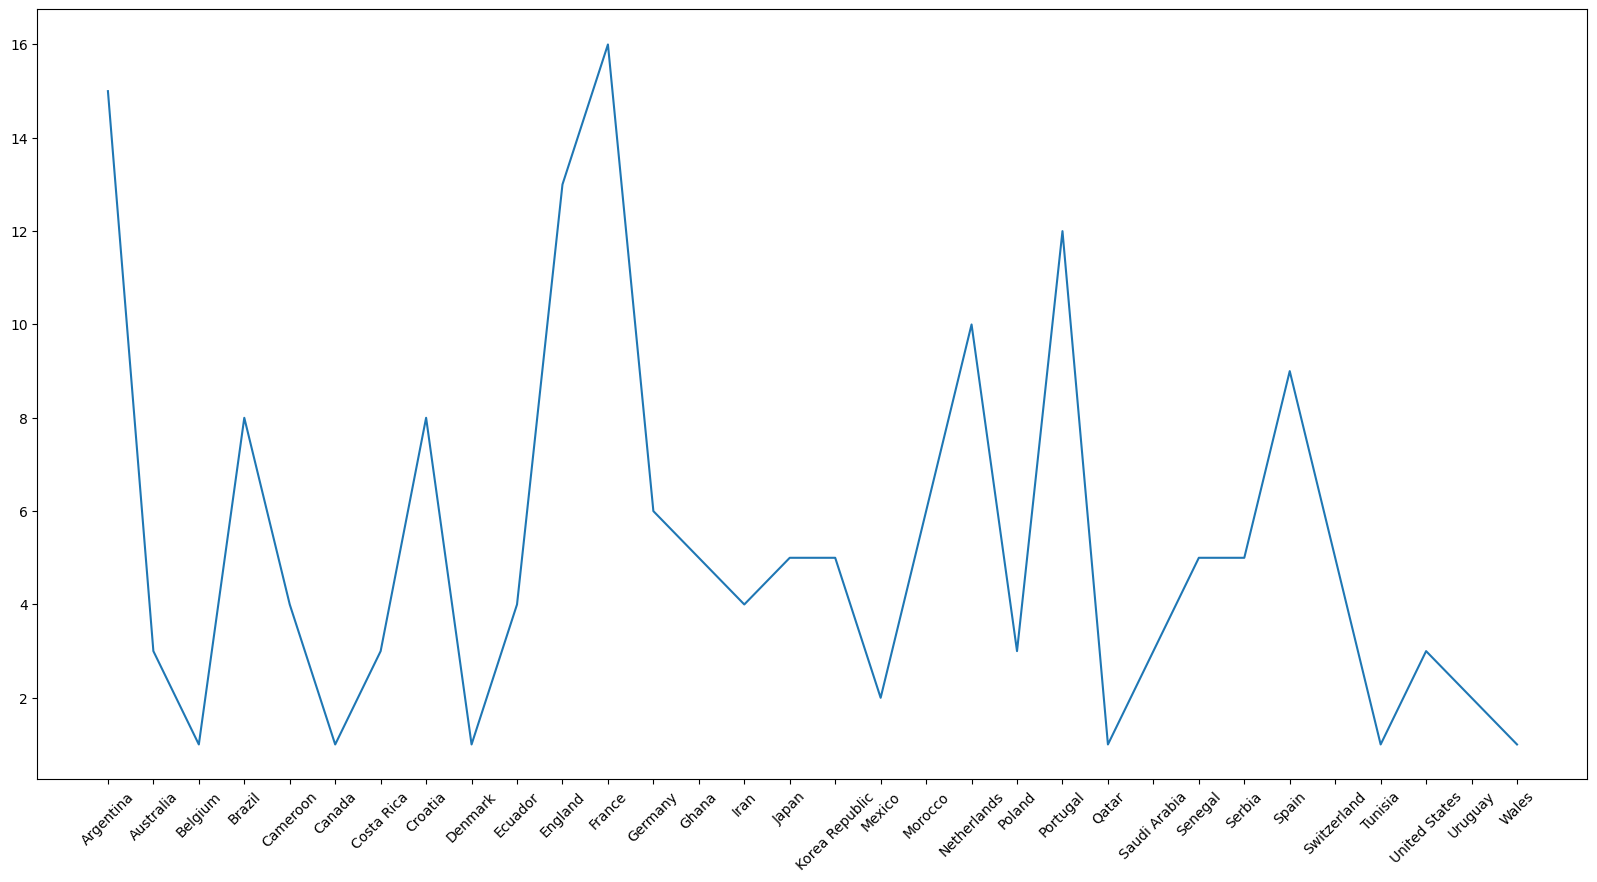

In [ ]:
plt.figure(figsize=(20,10))
#Crie um gráfico onde o eixo x tenha como valores as equipes qeu disputam a competição e no eixo y, o número de gols
plt.plot(worldcup['Squad'], worldcup['Gls'])
plt.tick_params(axis='x', labelrotation=45)
plt.show()

##Algoritmo de Machine Learning

###Divisão de dados de treino e teste

In [ ]:
X = worldcup[['Age', 'Poss', 'Ast']]
y = worldcup['Gls']

In [ ]:
#Utilizando dados de 'Age', 'Poss' e 'Ast' para prever os dados de 'Gls'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
print('Shape dos dados de treino: {}'.format(X_train.shape))
print('Shape das classes de treino: {}'.format(y_train.shape, '\n'))
print('Shape dos dados de teste: {}'.format(X_test.shape))
print('Shape das classes de teste: {}'.format(y_test.shape))

Shape dos dados de treino: (22, 3)
Shape das classes de treino: (22,)
Shape dos dados de teste: (10, 3)
Shape das classes de teste: (10,)


###Algoritmo de Regressão Linear

In [ ]:
#Crie um algortimo de Regressão Linear
regressor_linear = LinearRegression()

###Treinamento do modelo

In [ ]:
#Treine o modelo com a função fit
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor_linear.score(X_test, y_test)

0.9237605269807991

In [ ]:
#Realize previsões com a função predict
previsoes = regressor_linear.predict(X_test)
previsoes

array([10.80213035,  0.70164377,  1.94496536,  6.71564662,  1.84847971,
        5.76608341,  6.93172508, 13.20912871, 15.77404434,  3.26343626])

##Visualização dos resultados

In [ ]:
#Calculando ponto de interceptação
regressor_linear.intercept_

-0.21564928806846595

In [ ]:
#Calculando valores de coenficiente
regressor_linear.coef_

array([ 0.04793486, -0.00786641,  1.26104612])

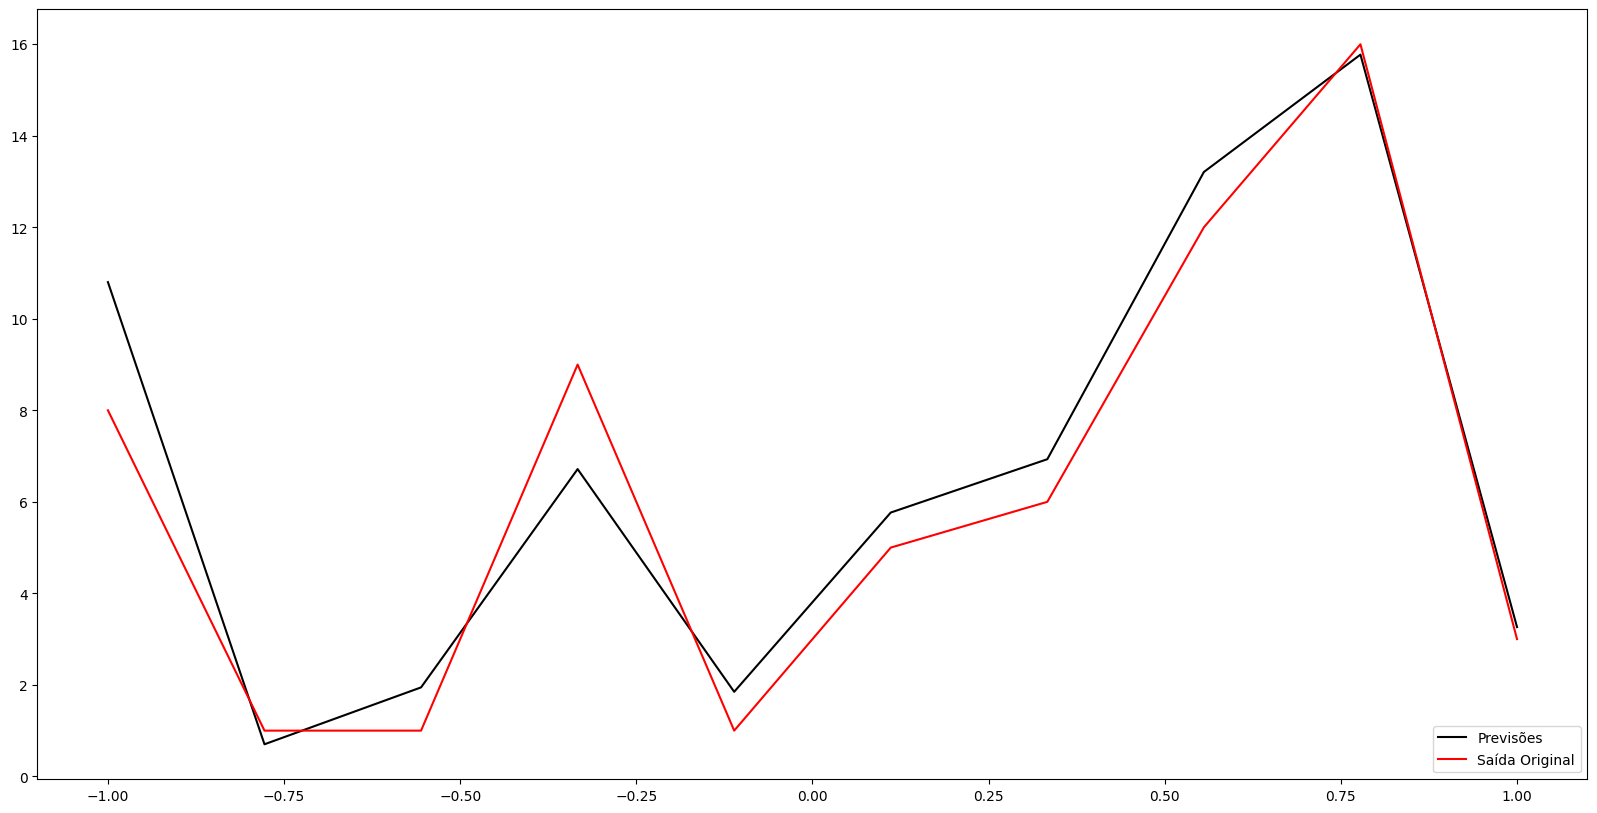

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(np.linspace(-1, 1, len(y_test)), previsoes, label='Previsões', color='black', linewidth=1.5)
plt.plot(np.linspace(-1, 1, len(y_test)), y_test, label='Saída Original', color='red', linewidth=1.5)
plt.legend(loc="lower right")
plt.show()

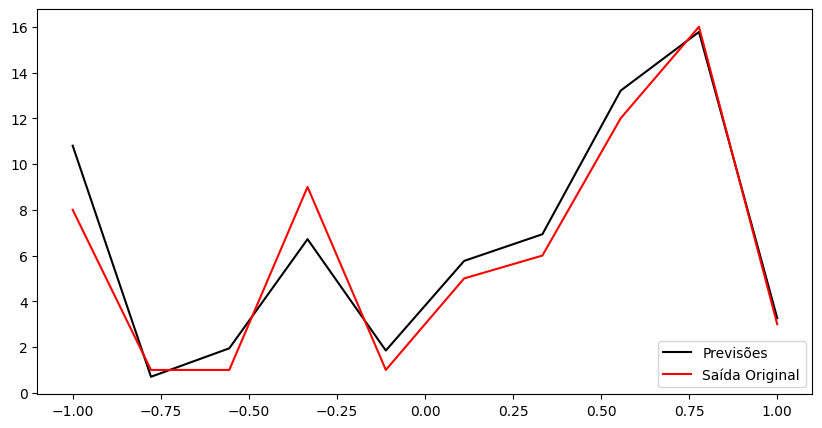

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(-1, 1, 10), previsoes, label='Previsões', color='black', linewidth=1.5)
plt.plot(np.linspace(-1, 1, 10), y_test, label='Saída Original', color='red', linewidth=1.5)
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Calculando métricas de avaliação para modelos de regressão
print(" Erro máx. {}.\n Erro médio absoluto: {}.\n Erro quadrático absoluto: {}.\n Raiz do erro quadrático médio: {}. "
      .format(max_error(previsoes, y_test),mean_absolute_error(previsoes, y_test),
      mean_squared_error(previsoes, y_test),mean_squared_error(previsoes, y_test)
      ))

 Erro máx. 2.80213034637557.
 Erro médio absoluto: 1.057461414788088.
 Erro quadrático absoluto: 1.7809540897285316.
 Raiz do erro quadrático médio: 1.7809540897285316. 


##Atividades de casa
- Configure o conjunto de dados de entrada para obter melhores desempenhos do algoritmo de regressão linear para estimar o número de gols de cada time;
- Desenvolva um algoritmo utilizando regressão linear para estimar a idade dos jogadores;
- Utilizando a correlação das variaveis, construa um algoritmo de regressão linear para estimar o número de gols de cada time e o número de assitências.

Configure o conjunto de dados de entrada para obter melhores desempenhos do algoritmo de regressão linear para estimar o número de gols de cada time;

In [ ]:
#Analisando a correlação dos dados
corr = worldcup.drop(columns=['Squad']).corr()

In [ ]:
corr.loc[corr['Gls'] >= 0.8]

,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
Gls,0.518385,-0.248491,0.418743,0.778636,0.778636,0.774649,0.773743,1.000000,0.943872,0.989174,...,0.867540,0.798809,0.859231,0.820432,0.829805,0.467290,0.361125,0.430737,0.388196,0.384934
Ast,0.491619,-0.226458,0.437578,0.760216,0.760216,0.750804,0.749814,0.943872,1.000000,0.982126,...,0.816811,0.891654,0.874823,0.807312,0.868949,0.437544,0.410909,0.435216,0.403324,0.416897
G+A,0.513808,-0.242208,0.433019,0.781439,0.781439,0.774985,0.774030,0.989174,0.982126,1.000000,...,0.857244,0.851329,0.878282,0.826180,0.858904,0.460668,0.388338,0.438805,0.400395,0.404566
G-PK,0.526568,-0.252491,0.402733,0.779485,0.779485,0.774714,0.773121,0.984376,0.963300,0.988902,...,0.867713,0.833746,0.875761,0.858791,0.867419,0.415943,0.337466,0.390603,0.365988,0.364499
xG,0.550867,-0.133575,0.455246,0.733594,0.733594,0.736722,0.736429,0.835374,0.767086,0.816823,...,0.641249,0.599838,0.638854,0.554732,0.590147,0.755255,0.660357,0.728817,0.691057,0.684193
Gls90,0.371514,-0.324854,0.416399,0.428579,0.428579,0.421466,0.419912,0.867540,0.816811,0.857244,...,1.000000,0.892949,0.977155,0.972738,0.956101,0.552971,0.427379,0.508628,0.483155,0.468337
G+A90,0.385139,-0.311808,0.446664,0.445239,0.445239,0.435267,0.433713,0.859231,0.874823,0.878282,...,0.977155,0.968203,1.000000,0.969042,0.991605,0.558375,0.480454,0.535115,0.515111,0.511216
G-PK90,0.388279,-0.310884,0.380004,0.400340,0.400340,0.393325,0.391167,0.820432,0.807312,0.826180,...,0.972738,0.907940,0.969042,1.000000,0.978111,0.472565,0.378578,0.440745,0.442113,0.428096
G+A-PK90,0.394109,-0.301751,0.426796,0.429852,0.429852,0.419871,0.418005,0.829805,0.868949,0.858904,...,0.956101,0.975250,0.991605,0.978111,1.000000,0.512605,0.454442,0.497250,0.491961,0.489095


In [ ]:
X = worldcup[['G-PK', 'G+A', 'Ast', 'xG', 'Gls90', 'G+A90', 'G-PK90', 'G+A-PK90']]
y = worldcup['Gls']

#Utilizando dados de 'Age', 'Poss' e 'Ast' para prever os dados de 'Gls'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#Crie um algortimo de Regressão Linear
regressor_linear = LinearRegression()

#Treine o modelo com a função fit
regressor_linear.fit(X_train, y_train)
regressor_linear.score(X_test, y_test)

#Realize previsões com a função predict
previsoes = regressor_linear.predict(X_test)
previsoes

array([ 8.,  1.,  1.,  9.,  1.,  5.,  6., 12., 16.,  3.])

In [ ]:
#Calculando métricas de avaliação para modelos de regressão
print(" Erro máx. {}.\n Erro médio absoluto: {}.\n Erro quadrático absoluto: {}.\n Raiz do erro quadrático médio: {}. "
      .format(max_error(previsoes, y_test),mean_absolute_error(previsoes, y_test),
      mean_squared_error(previsoes, y_test),mean_squared_error(previsoes, y_test)
      ))

 Erro máx. 6.217248937900877e-15.
 Erro médio absoluto: 2.220446049250313e-15.
 Erro quadrático absoluto: 8.401368640603776e-30.
 Raiz do erro quadrático médio: 8.401368640603776e-30. 


Desenvolva um algoritmo utilizando regressão linear para estimar a idade dos jogadores;

In [ ]:
worldcup.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
0,Argentina,24,27.5,57.4,7,77,690,7.7,15,8,...,1.96,1.04,3.00,1.43,2.48,1.96,1.00,2.97,1.47,2.48
1,Australia,20,27.8,37.8,4,44,360,4.0,3,3,...,0.75,0.75,1.50,0.75,1.50,0.58,0.48,1.06,0.58,1.06
2,Belgium,20,29.7,57.0,3,33,270,3.0,1,1,...,0.33,0.33,0.67,0.33,0.67,1.57,1.27,2.85,1.57,2.85
3,Brazil,26,27.6,56.2,5,55,480,5.3,8,6,...,1.50,1.13,2.62,1.31,2.44,2.24,1.54,3.79,2.09,3.64
4,Cameroon,22,27.2,41.7,3,33,270,3.0,4,4,...,1.33,1.33,2.67,1.33,2.67,1.14,0.66,1.80,1.14,1.80


In [ ]:
X = worldcup.drop(['Age', 'Squad'], axis=1)
y = worldcup['Age']

#Utilizando dados de 'Age', 'Poss' e 'Ast' para prever os dados de 'Gls'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#Crie um algortimo de Regressão Linear
regressor_linear = LinearRegression()

#Treine o modelo com a função fit
regressor_linear.fit(X_train, y_train)
regressor_linear.score(X_test, y_test)

#Realize previsões com a função predict
previsoes = regressor_linear.predict(X_test)
previsoes

array([17.51400408, -4.08248514, 23.97080238, 12.26535553, 27.59984708,
       36.27871295, 23.0818938 , 17.37432964,  8.10000582, 25.17757335])

In [ ]:
#Calculando métricas de avaliação para modelos de regressão
print(" Erro máx. {}.\n Erro médio absoluto: {}.\n Erro quadrático absoluto: {}.\n Raiz do erro quadrático médio: {}. "
      .format(max_error(previsoes, y_test),mean_absolute_error(previsoes, y_test),
      mean_squared_error(previsoes, y_test),mean_squared_error(previsoes, y_test)
      ))

 Erro máx. 30.88248513814354.
 Erro médio absoluto: 10.197708056923059.
 Erro quadrático absoluto: 177.69000188454424.
 Raiz do erro quadrático médio: 177.69000188454424. 


Utilizando a correlação das variaveis, construa um algoritmo de regressão linear para estimar o número de gols de cada time e o número de assitências.

In [ ]:
worldcup_country = worldcup.groupby('Squad').sum().reset_index()
worldcup_country.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
0,Argentina,24,27.5,57.4,7,77,690,7.7,15,8,...,1.96,1.04,3.00,1.43,2.48,1.96,1.00,2.97,1.47,2.48
1,Australia,20,27.8,37.8,4,44,360,4.0,3,3,...,0.75,0.75,1.50,0.75,1.50,0.58,0.48,1.06,0.58,1.06
2,Belgium,20,29.7,57.0,3,33,270,3.0,1,1,...,0.33,0.33,0.67,0.33,0.67,1.57,1.27,2.85,1.57,2.85
3,Brazil,26,27.6,56.2,5,55,480,5.3,8,6,...,1.50,1.13,2.62,1.31,2.44,2.24,1.54,3.79,2.09,3.64
4,Cameroon,22,27.2,41.7,3,33,270,3.0,4,4,...,1.33,1.33,2.67,1.33,2.67,1.14,0.66,1.80,1.14,1.80


In [ ]:
X = worldcup.drop(['Gls', 'Squad', 'Ast'], axis=1)
y = worldcup[['Gls', 'Ast']]

#Utilizando dados de 'Age', 'Poss' e 'Ast' para prever os dados de 'Gls'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#Crie um algortimo de Regressão Linear
regressor_linear = LinearRegression()

#Treine o modelo com a função fit
regressor_linear.fit(X_train, y_train)
regressor_linear.score(X_test, y_test)

#Realize previsões com a função predict
previsoes = regressor_linear.predict(X_test)
previsoes

array([[ 7.97454705,  8.03109216],
       [ 0.95297565,  0.05257605],
       [ 0.99707939,  1.00308685],
       [ 8.9704443 ,  5.03446909],
       [ 0.9992219 ,  1.00191177],
       [ 5.0198606 ,  3.97763613],
       [ 5.99454649,  5.00556679],
       [11.97816429, 10.02532654],
       [15.94062726, 12.07083314],
       [ 2.99169639,  2.0102534 ]])

##Referências
- [Dataset World Cup 2022](https://www.kaggle.com/datasets/greysonmb/2022-world-cup-stats)
- [Basics charts with Plotly](https://plotly.com/python/basic-charts/)
- [Seaborn](https://seaborn.pydata.org/)
- [Entendendo correlação](https://www.significados.com.br/correlacao/)
- [Regressão Linear](https://scikit-learn.org/stable/modules/linear_model.html)
- [Métricas de avaliação](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)